In [1]:
%pylab inline

import os
from styles import slides

Populating the interactive namespace from numpy and matplotlib


In [2]:
idir = os.path.expandvars("$phd/notebooks/data/age-resampling/")

bc03_step2_5Z = genfromtxt(idir+"bc03_step2/dynbas_output.log", dtype=None, names=True)
cb13_step2_5Z = genfromtxt(idir+"cb13_step2/dynbas_output.log", dtype=None, names=True)
cb13_step2_7Z = genfromtxt(idir+"cb13_step2_7Z/dynbas_output.log", dtype=None, names=True)
best_grid = genfromtxt(idir+"best_grid/dynbas_output.log", dtype=None, names=True)

snr = []
for file in cb13_step2_7Z["input_file"]:
    wl, fl, sg = loadtxt(idir+"bc03_step2/"+file.replace(".fit", ".log"), usecols=(0,1,2), unpack=True)
    snr.append(median((fl[fl>0]/sg[fl>0])[wl[fl>0]>7000]))

snr = array(snr)

idir = os.path.expandvars("$phd/notebooks/data/amr-dichotomy/")

bc03_step1_4Z = genfromtxt(idir+"test_c2/C2_table.txt", dtype=None, names=True)

print all(bc03_step2_5Z["input_file"]==cb13_step2_5Z["input_file"])
print all(bc03_step2_5Z["input_file"]==cb13_step2_7Z["input_file"])
print all(bc03_step2_5Z["input_file"]==best_grid["input_file"])
print all(bc03_step2_5Z["input_file"]==array(["dynbasfit_processed_SPEC_"+name.replace(".fit", ".log") for name in bc03_step1_4Z["input_file"]]))

True
True
True
True


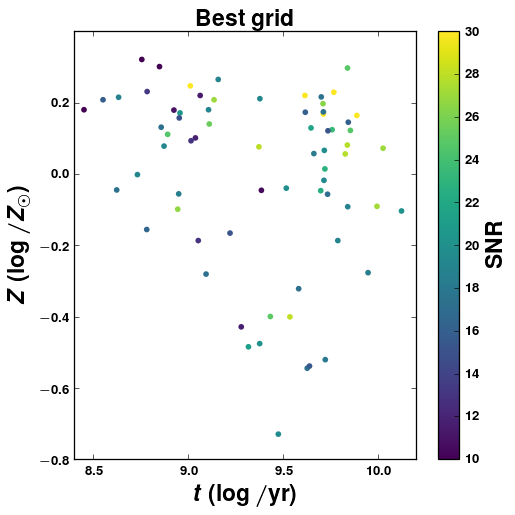

In [3]:
mask = snr>1
table = bc03_step1_4Z[mask]
table = cb13_step2_7Z[mask]
table = cb13_step2_5Z[mask]
table = best_grid[mask]

scatter(table["log_t_L_mod"], table["log_Z_L_mod"], c=snr[mask], lw=0, vmin=10, vmax=30, cmap=cm.viridis)
cb = colorbar()

xlim(8.4, 10.2)
ylim(-0.8, 0.4)

title(r"\bf Best grid")
xlabel(r"\bf$t$ ($\log/\textbf{yr}$)")
ylabel(r"\bf$Z$ ($\log/Z_\odot$)")
cb.set_label(r"\bf SNR")

('dynbasfit_processed_SPEC_spSpec-51614-0281-603.log', 3, 38420000000.0, 9.047, 9.012, 0.247, 0.247, 0.675, 90.3, 1.278)


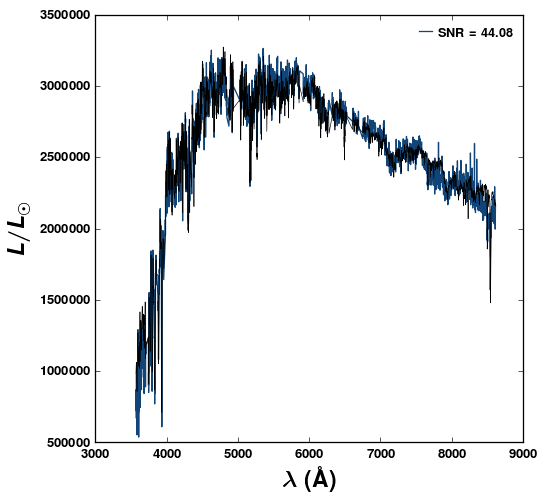

In [4]:
idir = os.path.expandvars("$phd/notebooks/data/age-resampling/")

mask = (table["log_Z_L_mod"]>0.2)&(table["log_t_L_mod"]<9.2)&(snr>28)
i = 0

print table[mask][i]

file = table["input_file"][mask][i]
wl, fl, sg, md = loadtxt(idir+"bc03_step2/"+file.replace(".fit", ".log"), usecols=(0,1,2,5), unpack=True)

plot(wl[fl>0], fl[fl>0], "-", lw=1, label=r"$\textbf{SNR}=%.2f$"%(snr[mask][i]))
plot(wl[fl>0], md[fl>0], "-k", lw=0.5)
legend(loc=0, fontsize=10)

xlim(3000, 9000)

xlabel(r"\bf $\lambda$ (\AA)")
ylabel(r"$L/L_\odot$")

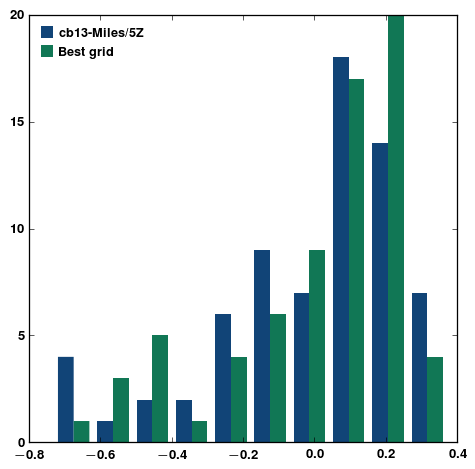

In [5]:
hist([cb13_step2_5Z["log_Z_L_mod"], best_grid["log_Z_L_mod"]], label=[r"\bf cb13-Miles/5Z", r"\bf Best grid"])

legend(loc=0, fontsize=10)